In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [48]:
c_data=pd.read_csv('/content/calories.csv')

In [49]:
c_data.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [50]:
e_data=pd.read_csv('/content/exercise.csv')

In [51]:
e_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [52]:
data=pd.concat([e_data,c_data['Calories']],axis=1)

In [53]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8      35.0

In [54]:
data.shape

(15000, 9)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<ipython-input-56-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

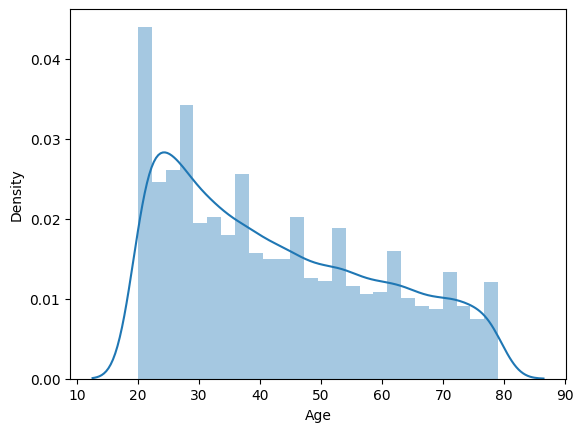

In [56]:
sns.distplot(data['Age'])

<Axes: xlabel='Gender', ylabel='Calories'>

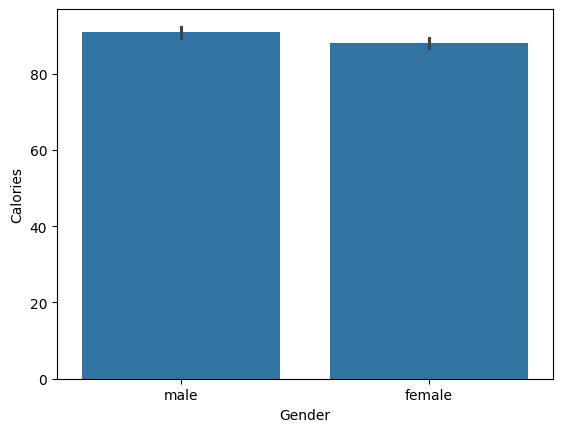

In [57]:
sns.barplot(x='Gender',y="Calories",data=data)

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

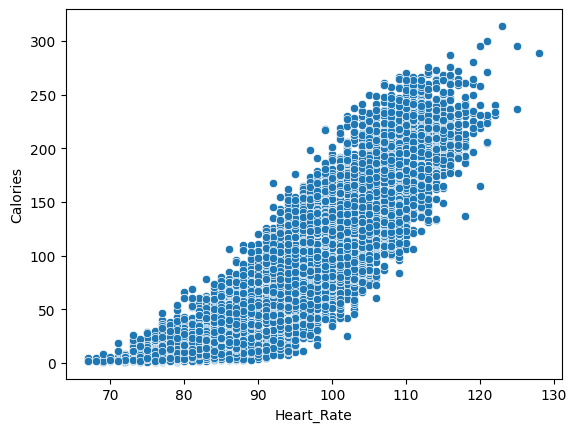

In [58]:
sns.scatterplot(x="Heart_Rate",y="Calories",data=data)

<Axes: xlabel='Body_Temp', ylabel='Calories'>

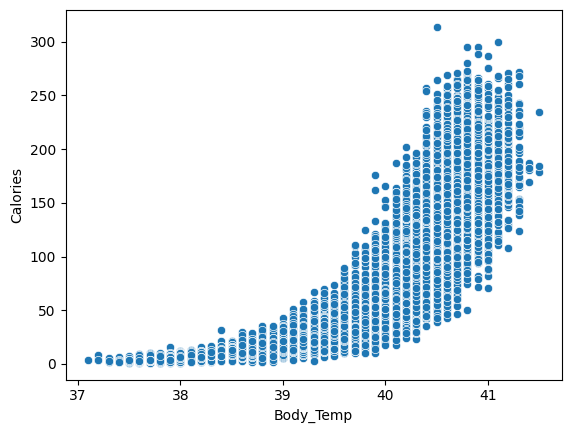

In [59]:
sns.scatterplot(x="Body_Temp",y="Calories",data=data)

In [61]:
data.replace({'Gender':{'male':1,'female':0}},inplace=True)

In [62]:
data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8     231.0
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3      66.0
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7      26.0
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5      71.0
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8      35.0

<Axes: xlabel='Gender', ylabel='count'>

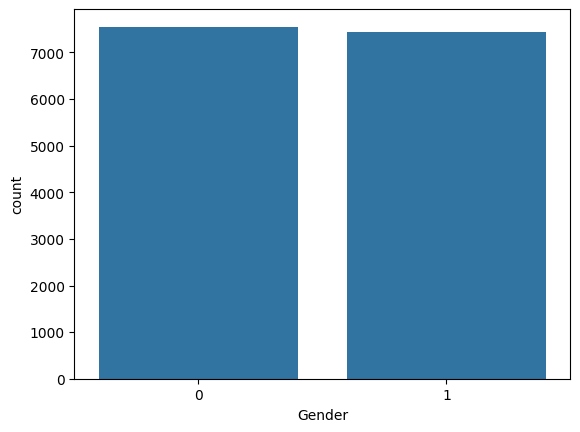

In [63]:
sns.countplot(x='Gender',data=data)

In [64]:
x=data.drop('Calories',axis=1)
y=data['Calories']

In [65]:
print(x)
print(y)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363       1   68   190.0    94.0      29.0       105.0       40.8
1      14861698       0   20   166.0    60.0      14.0        94.0       40.3
2      11179863       1   69   179.0    79.0       5.0        88.0       38.7
3      16180408       0   34   179.0    71.0      13.0       100.0       40.5
4      17771927       0   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082       0   20   193.0    86.0      11.0        92.0       40.4
14996  17212577       0   27   165.0    65.0       6.0        85.0       39.2
14997  17271188       0   43   159.0    58.0      16.0        90.0       40.1
14998  18643037       1   78   193.0    97.0       2.0        84.0       38.3
14999  11751526       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]
0        231.0
1         66.0
2       

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 8) (12000, 8) (3000, 8)


In [68]:
model=XGBRegressor(n_estimators=100,random_state=2)


In [69]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [70]:
test_prd=model.predict(x_test)
print(test_prd)

[122.1084   222.73364   38.985115 ... 144.76479   23.58275   90.93156 ]


In [71]:
mae=metrics.mean_absolute_error(y_test,test_prd)
print(mae)

1.57148710261782
